## Forecast the sales for 1 year for the furniture products category on the basis of the historical data

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [2]:
df = pd.read_excel(r'Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
furniture = df[df['Category']=='Furniture']
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
# furniture['Order Date']=pd.to_datetime(furniture['Order Date'])
# This will be used when the DATE dtype is object datatype to convert it into datetime.

In [8]:
furniture['Order Date'].min() , furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture = furniture[['Order Date', 'Sales']]
furniture.shape

(2121, 2)

In [10]:
furniture = furniture.sort_values('Order Date', ascending=True)
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [12]:
# To check multiple entry on the same day. If the 1st record does not show 1 it means that grouping is required.
furniture['Order Date'].value_counts()

2016-09-05    10
2017-10-30     9
2016-12-25     9
2017-11-19     9
2016-12-01     9
              ..
2017-04-15     1
2015-07-24     1
2014-04-19     1
2016-07-21     1
2016-01-23     1
Name: Order Date, Length: 889, dtype: int64

In [13]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [14]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [15]:
furniture = furniture.set_index('Order Date')

In [16]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [17]:
furniture.shape

(889, 1)

### The sample is formed on the basis of week previously it was in daily basis for this index should be datetime variable and also sorted.


In [18]:
y = furniture['Sales'].resample('W').mean()

In [19]:
print(y)

Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64


In [20]:
y.shape

(208,)

<function matplotlib.pyplot.show(*args, **kw)>

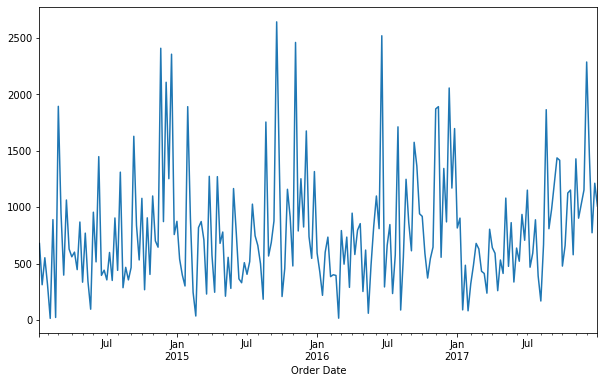

In [21]:
# Plot function to plot lineplot
y.plot(figsize=(10, 6))
plt.show

In [22]:
# For Month
x = furniture['Sales'].resample('M').mean()

<function matplotlib.pyplot.show(*args, **kw)>

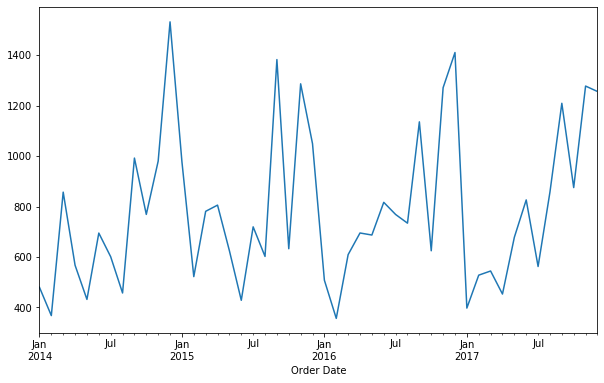

In [23]:
x.plot(figsize=(10, 6))
plt.show

In [24]:
x.shape

(48,)

In [25]:
train = x.loc[:'2016-12-31']
#train=x.iloc[0:36]
print(train.shape)

(36,)


In [26]:
test = x.loc['2017-1-31':]
#test=x.iloc[0:36]
print(test.shape)

(12,)


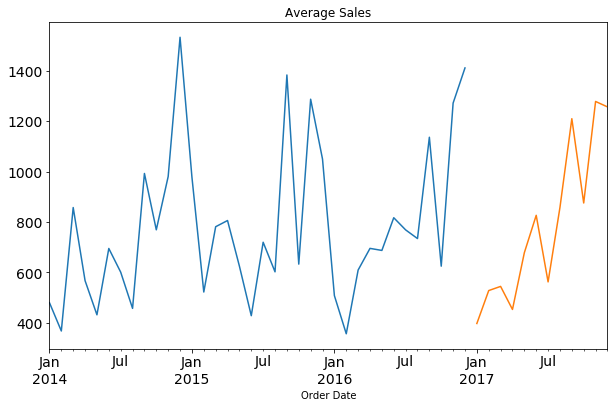

In [27]:
train.plot(figsize = (10,6),title = 'Average Sales', fontsize = 14)
test.plot(figsize = (10,6),title = 'Average Sales', fontsize = 14)
plt.show()

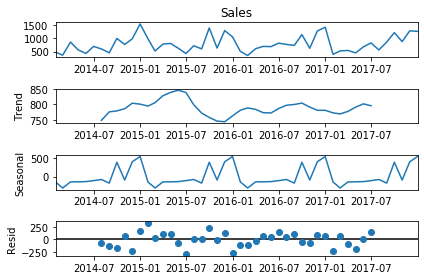

In [28]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(x)
decomposition.plot()
plt.show()

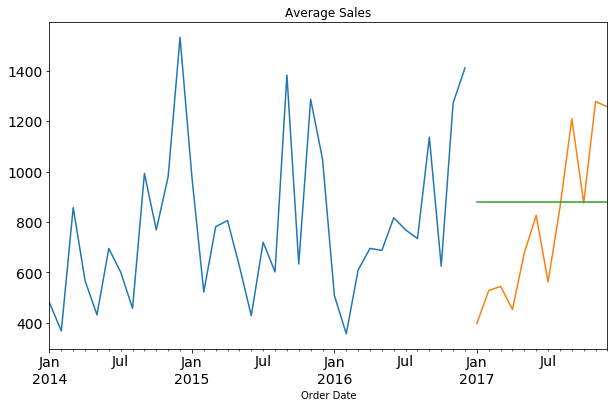

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [30]:
Exp_Smooth.SES

2017-01-31    878.386727
2017-02-28    878.386727
2017-03-31    878.386727
2017-04-30    878.386727
2017-05-31    878.386727
2017-06-30    878.386727
2017-07-31    878.386727
2017-08-31    878.386727
2017-09-30    878.386727
2017-10-31    878.386727
2017-11-30    878.386727
2017-12-31    878.386727
Freq: M, dtype: float64

In [31]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

416.62391319151993

In [32]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

316.33280047152726


C:\Users\karim khan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


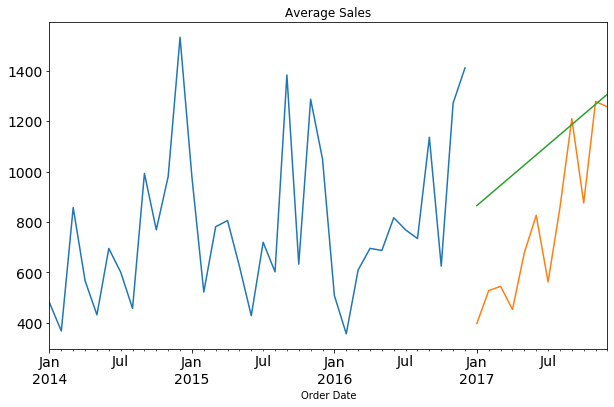

In [33]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.35)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

425.33816401339266

In [35]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

352.0241523619549


In [37]:
"""
 
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 
"""

"\n \nimport numpy as np\nmy_dict={}\nfor i in np.arange(0.01,1,0.01):\n    for j in np.arange(0.01,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        #print(fit1.aic,i,j)\n        my_dict[i,j] = fit1.aic\n \n"

In [38]:
### The above code is a trail and Error method to identify the best combination of alpha and beta

In [39]:
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

'\nfor k in my_dict:\n    if my_dict[k]==min(my_dict.values()):\n        print(k,":",my_dict[k])\n'

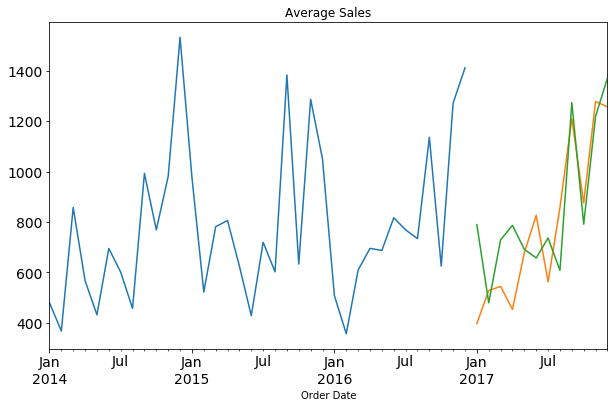

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [41]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

392.3906252085531

In [42]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

193.7115344790342


In [43]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680015
2017-02-28     479.584745
2017-03-31     729.439102
2017-04-30     786.559973
2017-05-31     691.434910
2017-06-30     657.425819
2017-07-31     736.375201
2017-08-31     608.142529
2017-09-30    1273.170675
2017-10-31     791.498417
2017-11-30    1218.795004
2017-12-31    1370.720618
Freq: M, dtype: float64

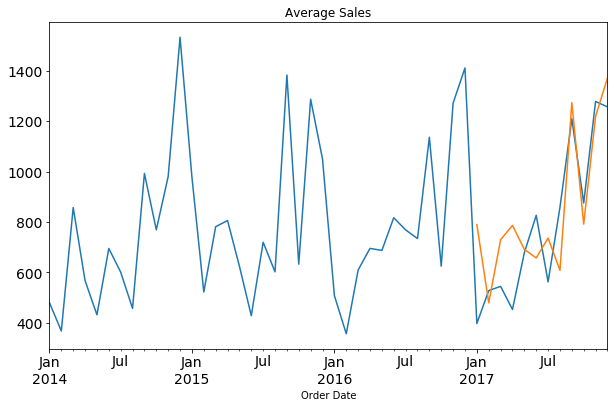

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Y_predictions = fit1.forecast(steps=12)
 
x.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [45]:
Y_predictions

2017-01-31     789.680015
2017-02-28     479.584745
2017-03-31     729.439102
2017-04-30     786.559973
2017-05-31     691.434910
2017-06-30     657.425819
2017-07-31     736.375201
2017-08-31     608.142529
2017-09-30    1273.170675
2017-10-31     791.498417
2017-11-30    1218.795004
2017-12-31    1370.720618
Freq: M, dtype: float64

In [46]:
Y_predictions.to_excel('TimeSeriesOutput.xlsx',header=['Sales'],index=True)

In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [47]:
#!pip install pmdarima

In [48]:
import pmdarima as pm

## Identidification 

In [52]:
model = pm.auto_arima(x,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.34 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.06 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.44 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.12 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.45 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=1.31 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=2.68 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=2.69 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=1.15 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [53]:
model.aic()

489.4176261246738

## SARIMA using Train (Estimation)

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

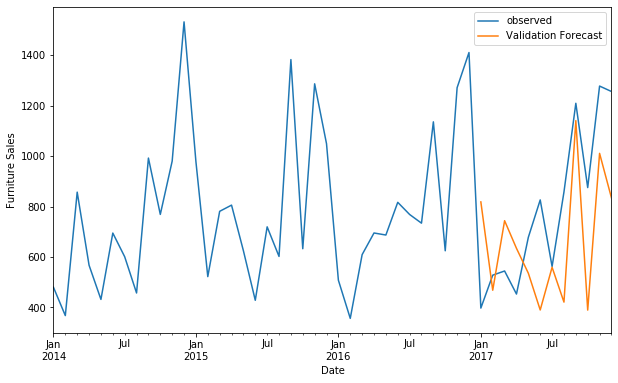

In [68]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
x.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [69]:
Y_pred = pred.predicted_mean
Y_test = x['2017-01-31':]
 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

308.76971163237585


## Forecasting

In [61]:
# SARIMA using x (Forecasting)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(x, order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

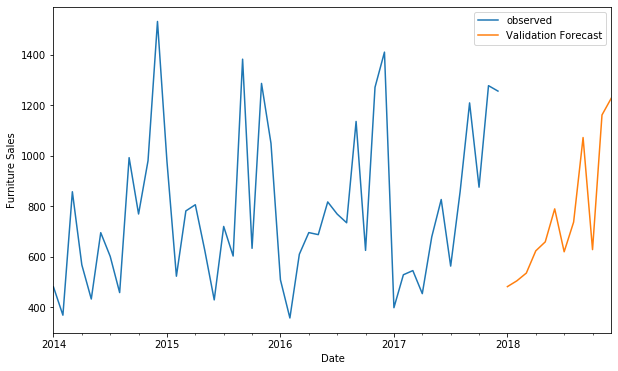

In [62]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
x.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [63]:
pred.predicted_mean

2018-01-31     481.175780
2018-02-28     504.162666
2018-03-31     534.896805
2018-04-30     623.058238
2018-05-31     658.537438
2018-06-30     789.387663
2018-07-31     619.269504
2018-08-31     736.930507
2018-09-30    1072.136408
2018-10-31     627.864086
2018-11-30    1161.662873
2018-12-31    1229.291142
Freq: M, Name: predicted_mean, dtype: float64

In [70]:
pred.predicted_mean.to_excel('TimeSeriesOutput_ARIMA.xlsx', header=['Sales'],index=True)